# Bibliotecas

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.linear_model import LinearRegression

# Carregar os dados para a Regressão

In [17]:
df = pd.read_csv('/content/car_data.csv')
df.head() #mostrar os primeiros 5 registro do dataframe

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


In [18]:
df.shape #(linhas, colunas)

(301, 9)

In [21]:
#Transformando variáveis numpericas em categóricas
df.replace({
    'tipo_transmissao': {'Manual': 0, 'Automatico': 1},
    'tipo_vendedor': {'Revendedor': 0, 'Individual': 1},
    'tipo_combustivel': {'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}
}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [24]:
#Separando as variáveis dependentes das independentes
# escolhendo as variáveis independentes
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]
# variável dependente
y = df[['preco_venda']]

In [26]:
#dividindo os dados...
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
print('Treino')
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

Treino
x_train:  (240, 7)
y_train:  (240, 1)

Teste
x_test:  (61, 7)
y_test:  (61, 1)


# Treinando o modelo de regressão

In [29]:
# Instanciando um objeto do tipo linearRegression. Definindo o nosso modelo
model = LinearRegression()

# treina o modelo com os dados de treino
model.fit(x_train, y_train)

LinearRegression()

In [32]:
# Fazendo a previsão dos valores usando os dados de testes
y_pred = model.predict(x_test)

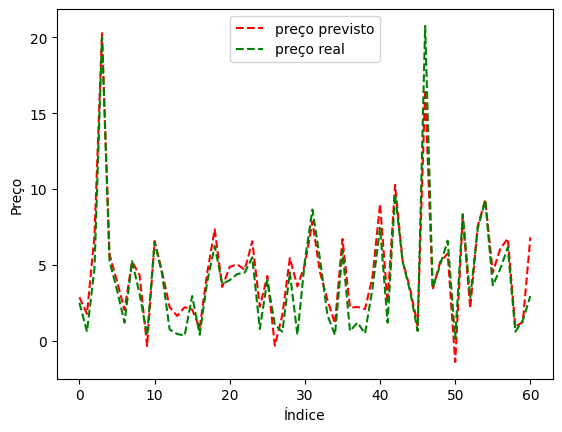

In [34]:
# plotando o resultado
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

# Exemplo II

In [44]:
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

In [45]:
print(new_x.shape)
print(new_y.shape)

(301, 4)
(301, 1)


In [46]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.2)

In [41]:
model2 = LinearRegression()
model2.fit(new_x_train, new_y_train)

LinearRegression()

In [42]:
new_y_pred = model2.predict(new_x_test)

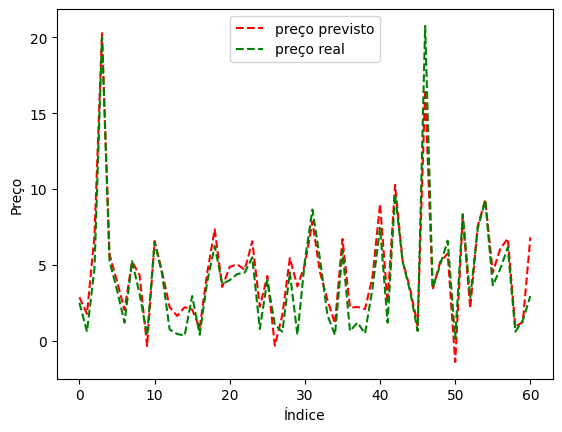

In [43]:
plt.plot(range(new_y_pred.shape[0]), y_pred,'r--')
plt.plot(range(new_y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()